In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# IMPACT OF FINANCIAL HABITS ON STAFF PRODUCTIVITY


# key Questions for this Project
#### 1. Which of the 5 measured variables of the Financial Success Index Score has the strongest influence on the Score
#### 2. Which of the 5 variables of the Financial Success Index Score has the strongest impact on employee diligence or productivity
#### 3. What impact can the insights from the data provide for chief executives and hr directors about lower and middle employees in their organisations

In [4]:
findex = pd.read_csv(r"C:\Users\Abraham Laleye\Desktop\Data Analytics New Psychometric\findex_data\findex_test_results.csv")
findex.head()

,age,sex,qualification,findex_score,fin_philosophy,money_retention,dep_money_generation,ind_money_gen,money_multiplication
0,25,m,BSc,83,95,97,97,58,67
1,42,f,MSc,80,90,85,97,72,58
2,54,m,BSc,78,85,73,89,80,65
3,21,f,BSc,76,92,75,87,65,62
4,36,m,OND,75,90,65,90,65,63


In [5]:
findex.dtypes

age                      int64
sex                     object
qualification           object
findex_score             int64
fin_philosophy           int64
money_retention          int64
dep_money_generation     int64
ind_money_gen            int64
money_multiplication     int64
dtype: object

In [7]:
findex.describe()

,age,findex_score,fin_philosophy,money_retention,dep_money_generation,ind_money_gen,money_multiplication
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,30.032609,52.364130,56.168478,55.222826,58.967391,46.885870,44.521739
std,7.373637,11.258173,14.041270,13.231826,14.623098,11.202216,11.104549
min,17.000000,26.000000,27.000000,27.000000,32.000000,25.000000,18.000000
25%,25.000000,44.000000,47.000000,45.000000,48.000000,38.000000,37.000000
50%,29.000000,51.500000,55.000000,53.000000,58.000000,45.000000,43.000000
75%,35.000000,61.000000,65.000000,65.000000,70.000000,53.000000,52.000000
max,54.000000,83.000000,95.000000,97.000000,97.000000,80.000000,75.000000


## Finacial Habits Measured and Their Meaming

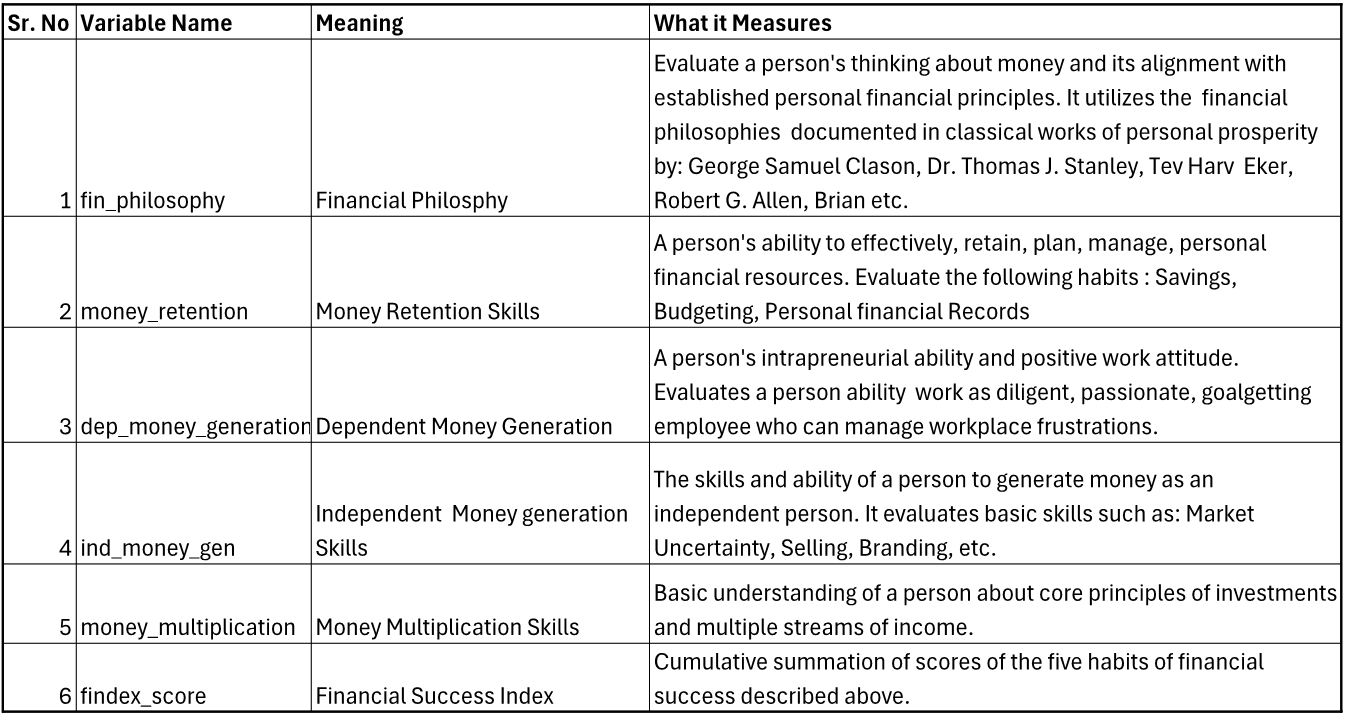

In [10]:
sex_summary = findex.sex.value_counts()
sex_summary

sex
m    101
f     83
Name: count, dtype: int64

In [11]:
female_pop = findex[findex.sex=='f']
male_pop = findex[findex.sex =='m']
print(female_pop.findex_score.mean())
print(male_pop.findex_score.mean())

51.36144578313253
53.18811881188119


In [12]:
#Male Vs Female Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue  =ttest_ind(male_pop.findex_score, female_pop.findex_score)

print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')


T Statistic is: 1.0958
 p_value is: 0.2746


In [13]:
qualification_summary = findex.qualification.value_counts(normalize=True)
qualification_summary


qualification
BSc        0.516304
OND        0.163043
O LEVEL    0.146739
MSc        0.086957
HND        0.065217
NCE        0.016304
PhD        0.005435
Name: proportion, dtype: float64

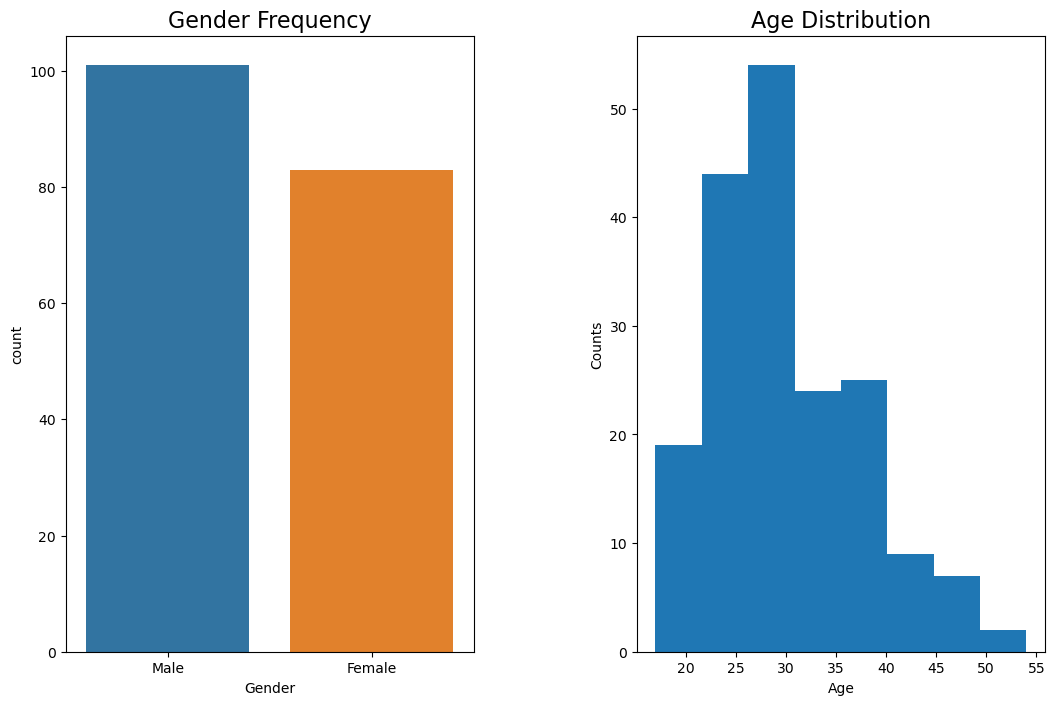

In [14]:
plt.figure(figsize=(20,8))
ax = plt.subplot(1,3,1)
sns.countplot(x=findex.sex)
plt.title('Gender Frequency', fontsize=16)
plt.xlabel('Gender')
ax.set_xticklabels(['Male','Female'])
plt.subplots_adjust(wspace=0.4)
plt.subplot(1,3,2)
plt.hist(findex.age, bins=8)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()



## Age and Gender Characteristics of Participants

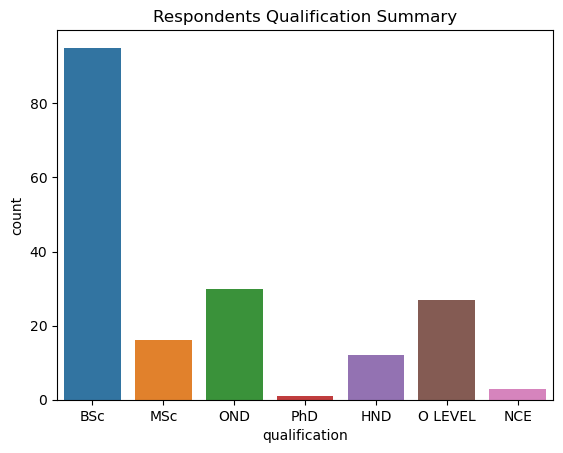

In [16]:
plt.Figure(figsize=(15,10))
sns.countplot(x=findex.qualification)
plt.title('Respondents Qualification Summary')
plt.show()
plt.close()

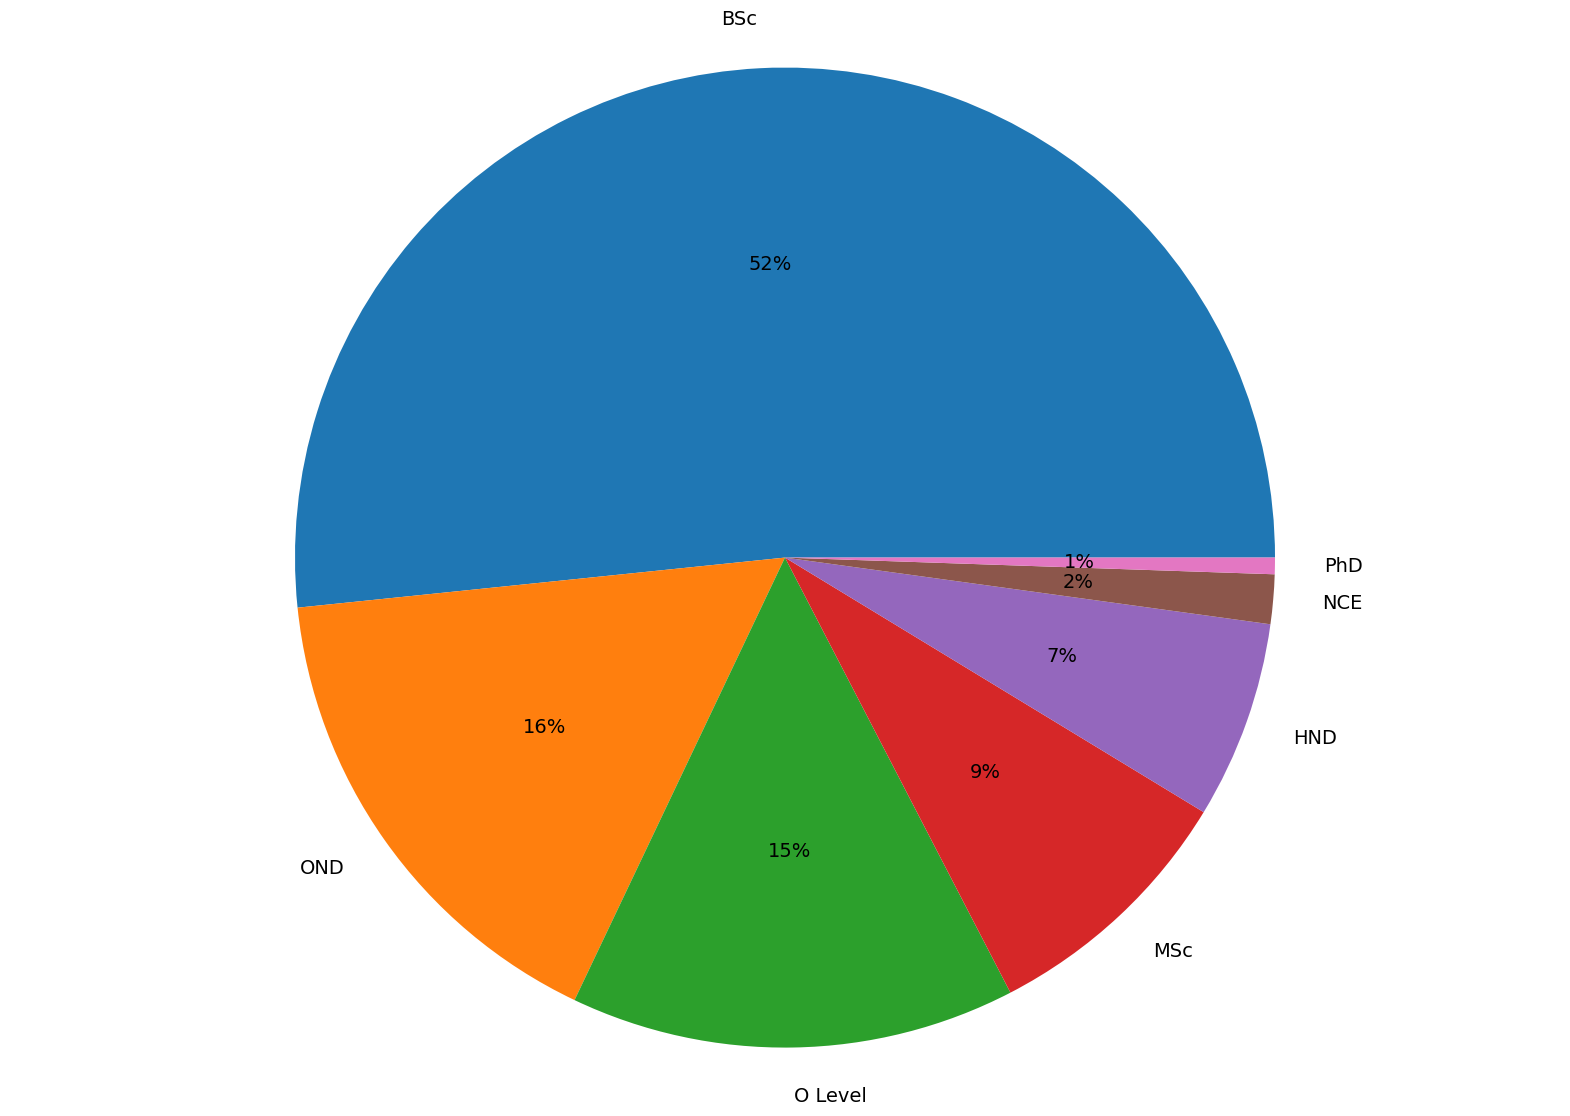

In [17]:
plt.figure(figsize=(20,14))
ax = plt.subplot(1,1,1)
labels = ['BSc','OND','O Level','MSc','HND','NCE','PhD']
plt.pie(qualification_summary, labels =labels, autopct='%.0f%%' )
plt.setp(ax.texts, size=14)
plt.axis('equal')
plt.show()
plt.close()

## Qualification Relationship with Financial Success Index

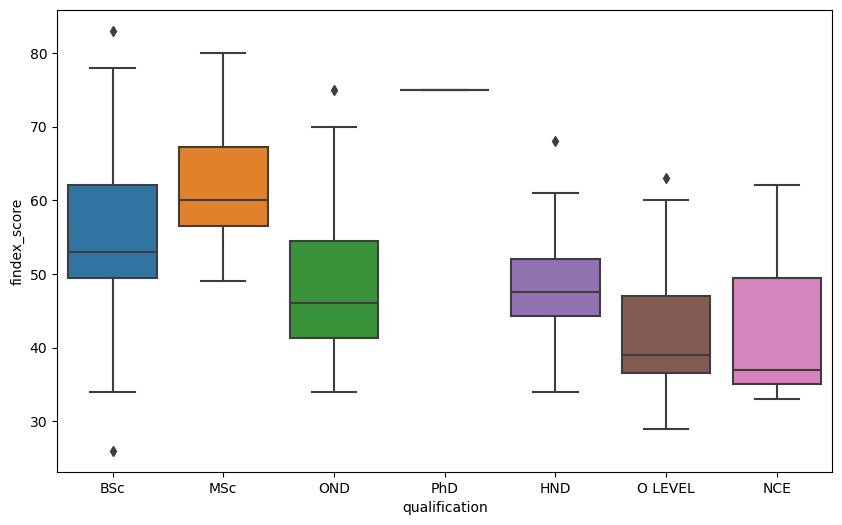

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.boxplot(x=findex.qualification, y = findex.findex_score)
plt.show()

In [20]:
ond_pop = findex[findex.qualification=='OND']
print(f' The mean for Participants with OND is:{ond_pop.findex_score.mean().round(2)}')
olv_pop = findex[findex.qualification=='O LEVEL']
print(f' The mean for Participants with O LEVEL is:{olv_pop.findex_score.mean().round(2)}')
bsc_pop = findex[findex.qualification=='BSc']
print(f' The mean for Participants with BSc is:{bsc_pop.findex_score.mean().round(2)}')
hnd_pop = findex[findex.qualification=='HND']
print(f' The mean for Participants with HND is:{hnd_pop.findex_score.mean().round(2)}')
nce_pop = findex[findex.qualification=='NCE']
print(f' The mean for Participants with NCE is:{nce_pop.findex_score.mean().round(2)}')
msc_pop = findex[findex.qualification=='MSc']
print(f' The mean for Participants with MSc is:{msc_pop.findex_score.mean().round(2)}')

 The mean for Participants with OND is:48.5
 The mean for Participants with O LEVEL is:42.0
 The mean for Participants with BSc is:55.46
 The mean for Participants with HND is:49.08
 The mean for Participants with NCE is:44.0
 The mean for Participants with MSc is:61.31


### Evaluate the Statical Significance of the Mean Difference Among Populations With Different Qualifications

In [22]:
#MSc Vs ONDl Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue  =ttest_ind(msc_pop.findex_score, olv_pop.findex_score)

print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')


T Statistic is: 7.2319
 p_value is: 0.0


In [23]:
#MSc Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.findex_score, ond_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 4.2378
 p_value is: 0.0001


In [24]:
#MSc Vs NCE Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.findex_score, nce_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.8584
 p_value is: 0.0109


In [25]:
#MSc Vs HND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.findex_score, hnd_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 3.6026
 p_value is: 0.0013


In [26]:
#MSc Vs BSc Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(msc_pop.findex_score, bsc_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.2199
 p_value is: 0.0285


In [27]:
#BSc Vs HND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.findex_score, hnd_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.1072
 p_value is: 0.0375


In [28]:
#BSc Vs NCE Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.findex_score, nce_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 1.9372
 p_value is: 0.0557


In [29]:
#BSc Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.findex_score, ond_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 3.3118
 p_value is: 0.0012


In [30]:
#BSc Vs O LEVEL Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(bsc_pop.findex_score, olv_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 6.4077
 p_value is: 0.0


In [31]:
#HND Vs OND Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(hnd_pop.findex_score, ond_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 0.1689
 p_value is: 0.8667


In [32]:
#HND Vs O Level Mean Difference
from scipy.stats import ttest_ind
statistic, pvalue =ttest_ind(hnd_pop.findex_score, olv_pop.findex_score)
print(f'T Statistic is: {statistic.round(4)}')
print(f' p_value is: {pvalue.round(4)}')

T Statistic is: 2.3349
 p_value is: 0.0251


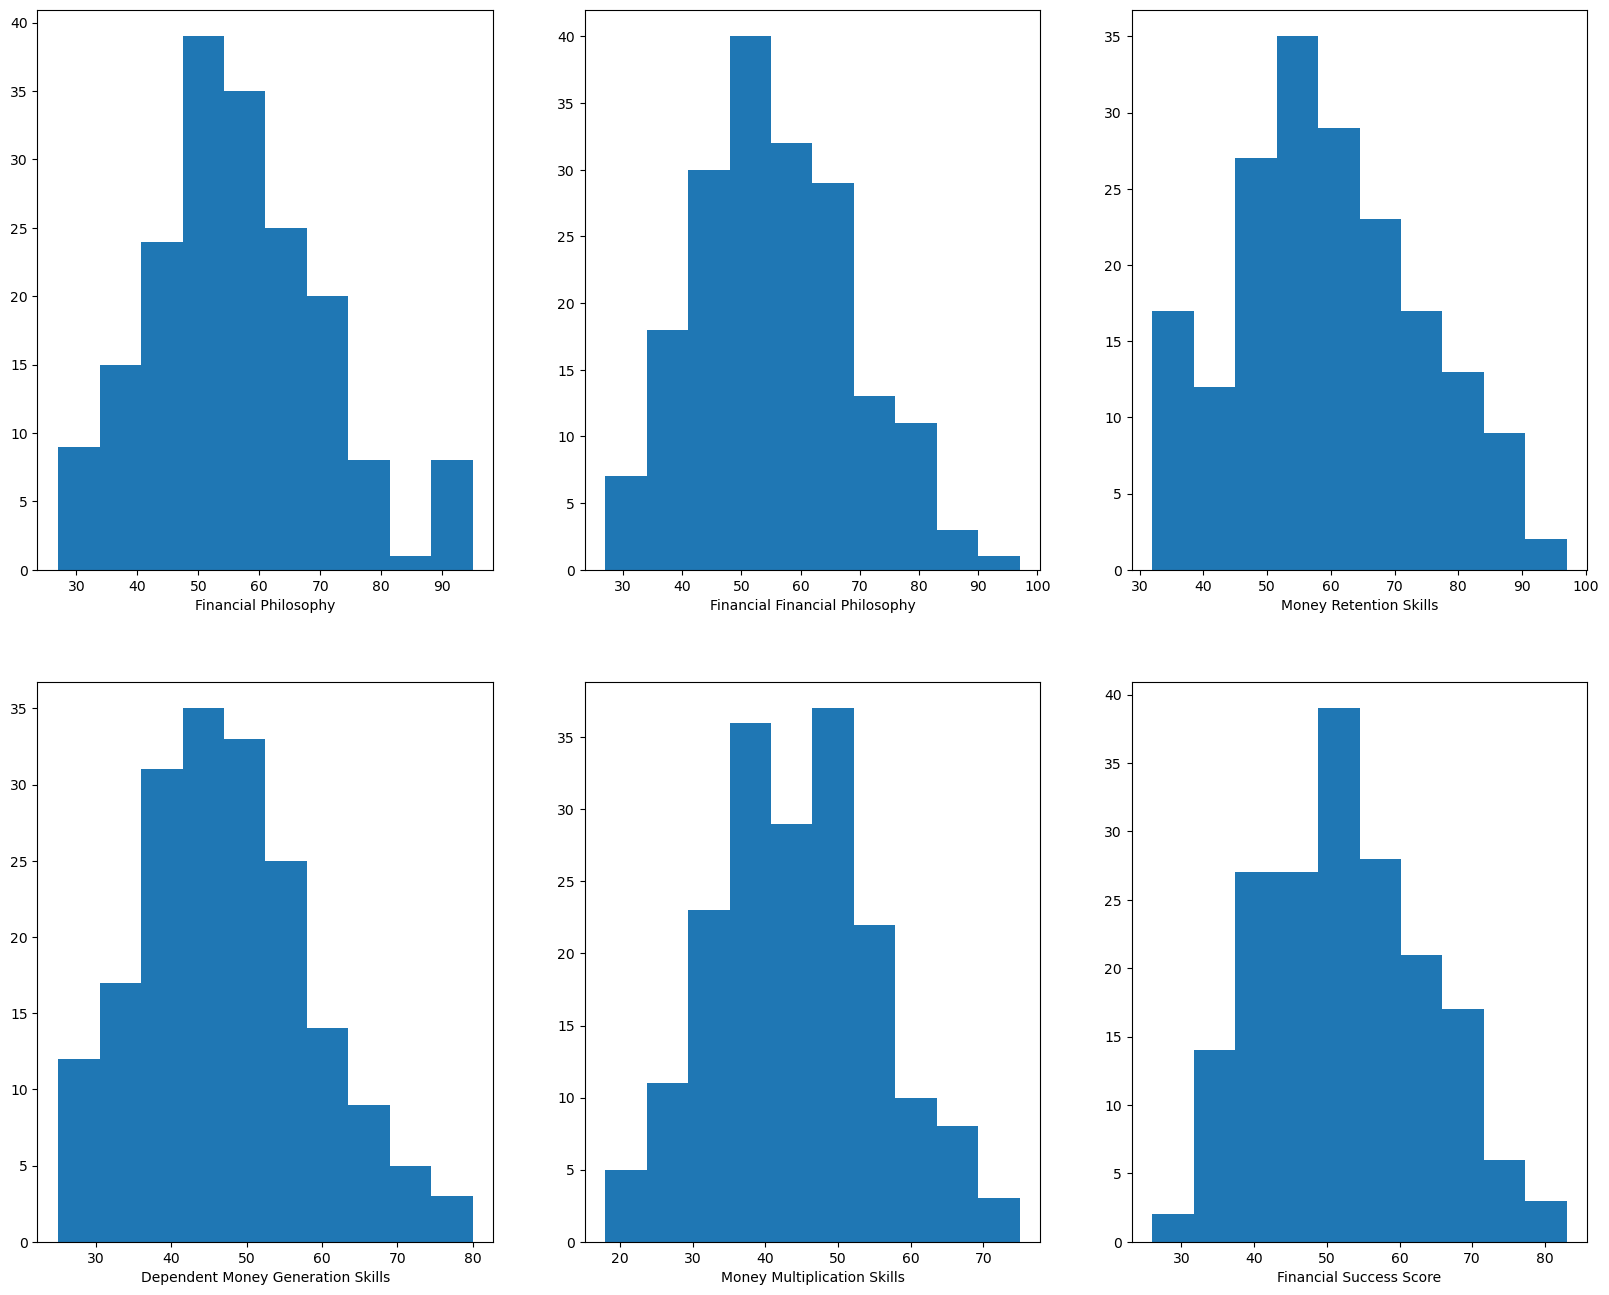

In [33]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,6)
plt.hist(findex.findex_score)
plt.xlabel('Financial Success Score')
plt.subplot(2,3,1)
plt.hist(findex.fin_philosophy)
plt.xlabel('Financial Philosophy')
plt.subplot(2,3,2)
plt.xlabel('Financial Financial Philosophy')
plt.hist(findex.money_retention)
plt.subplot(2,3,3)
plt.xlabel('Money Retention Skills')
plt.hist(findex.dep_money_generation)
plt.subplot(2,3,4)
plt.xlabel('Dependent Money Generation Skills')
plt.hist(findex.ind_money_gen)
plt.subplot(2,3,5)
plt.xlabel('Independent Money Generation Skills')
plt.hist(findex.money_multiplication)
plt.xlabel('Money Multiplication Skills')
plt.show()
plt.close()

## Relationship Between Key Financial Habits Measured and Financial Success Index

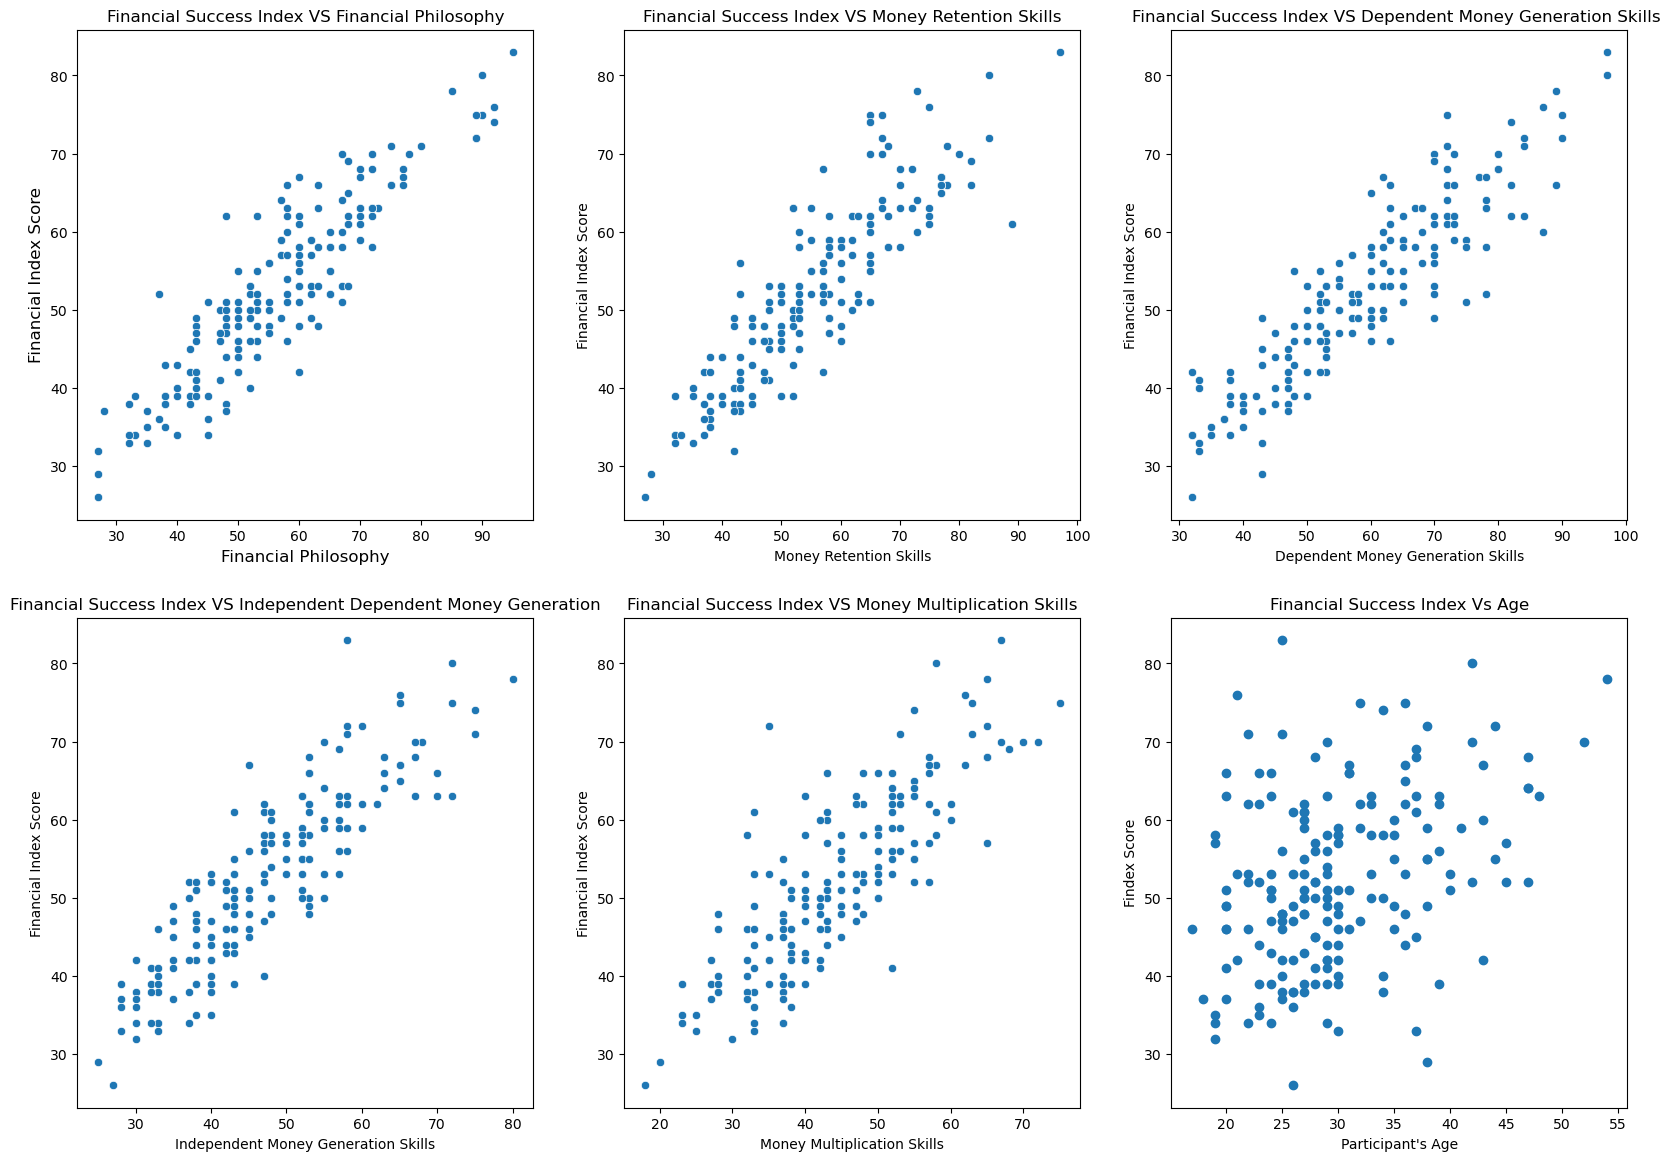

In [35]:
plt.figure(figsize=(20,14))

ax = plt.subplot(2,3,1)
sns.scatterplot(x=findex.fin_philosophy, y=findex.findex_score)
plt.title('Financial Success Index VS Financial Philosophy')
plt.xlabel('Financial Philosophy', fontsize=12)
plt.ylabel('Financial Index Score', fontsize=12)
plt.subplot(2,3,2)
sns.scatterplot(x=findex.money_retention, y=findex.findex_score)
plt.title('Financial Success Index VS Money Retention Skills')
plt.xlabel('Money Retention Skills')
plt.ylabel('Financial Index Score')
plt.subplot(2,3,3)
sns.scatterplot(x=findex.dep_money_generation, y=findex.findex_score)
plt.title('Financial Success Index VS Dependent Money Generation Skills ')
plt.xlabel('Dependent Money Generation Skills')
plt.ylabel('Financial Index Score')
plt.subplot(2,3,4)
sns.scatterplot(x=findex.ind_money_gen, y=findex.findex_score)
plt.title('Financial Success Index VS Independent Dependent Money Generation')
plt.xlabel('Independent Money Generation Skills')
plt.ylabel('Financial Index Score')
plt.subplot(2,3,5)
sns.scatterplot(x=findex.money_multiplication, y=findex.findex_score)
plt.title('Financial Success Index VS Money Multiplication Skills')
plt.xlabel('Money Multiplication Skills')
plt.ylabel('Financial Index Score')
plt.subplot(2,3,6)
plt.scatter(x=findex.age, y= findex.findex_score)
plt.title('Financial Success Index Vs Age')
plt.xlabel("Participant's Age")
plt.ylabel('Findex Score')
plt.show()
plt.close()

## Correlation Coefficient Per Variable Measured (Strength of Relationship Between Financial Success Index &  Measured Variables)

In [37]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
fin_phi_coff, p = pearsonr(x=findex.fin_philosophy, y=findex.findex_score)
print(f'Correlation coefficient of Financial Philosophy is: {fin_phi_coff.round(4)}')
print( f'The p_value for Financial Philosophy is:{p.round(4)}')


Correlation coefficient of Financial Philosophy is: 0.905
The p_value for Financial Philosophy is:0.0


In [38]:
model = sm.OLS.from_formula('findex_score ~ fin_philosophy', data=findex)
results = model.fit()
print(results.params)

Intercept         11.606375
fin_philosophy     0.725634
dtype: float64


In [39]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
money_ret_coff, p = pearsonr(x=findex.money_retention, y=findex.findex_score)
print(f'Correlation coefficient of Money Retention is: {money_ret_coff.round(4)}')
print(f'The p_value for Money retention is {p.round(4)}')

Correlation coefficient of Money Retention is: 0.8765
The p_value for Money retention is 0.0


In [40]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
dep_gen_coff, p = pearsonr(x=findex.dep_money_generation, y=findex.findex_score)
print(f'Correlation coefficient of Dependent Money Generation is: {dep_gen_coff.round(4)}')
print(f'The p-value for Dependent Money Generation is: {p.round(4)}')

Correlation coefficient of Dependent Money Generation is: 0.8997
The p-value for Dependent Money Generation is: 0.0


In [41]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
ind_gen_coff, p = pearsonr(x=findex.ind_money_gen, y=findex.findex_score)
print(f'Correlation coefficient of Independent Money Generation is: {ind_gen_coff.round(4)}')
print(f'The p_value for Independent Money Generation is: {p.round(4)} ')

Correlation coefficient of Independent Money Generation is: 0.8721
The p_value for Independent Money Generation is: 0.0 


In [42]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
mon_mul_coff, p = pearsonr(x=findex.money_multiplication, y=findex.findex_score)
print(f'Correlation coefficient of Money Multiplication is: {mon_mul_coff}')
print(f'The p_value for Money Multiplication is: {p.round(4)}')

Correlation coefficient of Money Multiplication is: 0.821617378362917
The p_value for Money Multiplication is: 0.0


In [43]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
age_mul_coff, p = pearsonr(x=findex.age, y=findex.findex_score)
print(f'Correlation coefficient of Money Multiplication is: {age_mul_coff.round(4)}')
print(f'The p_value for Age is: {p.round(4)}')

Correlation coefficient of Money Multiplication is: 0.3661
The p_value for Age is: 0.0


## Relationship of Key Financial Habits on Employee Work Attitude and Productivity 

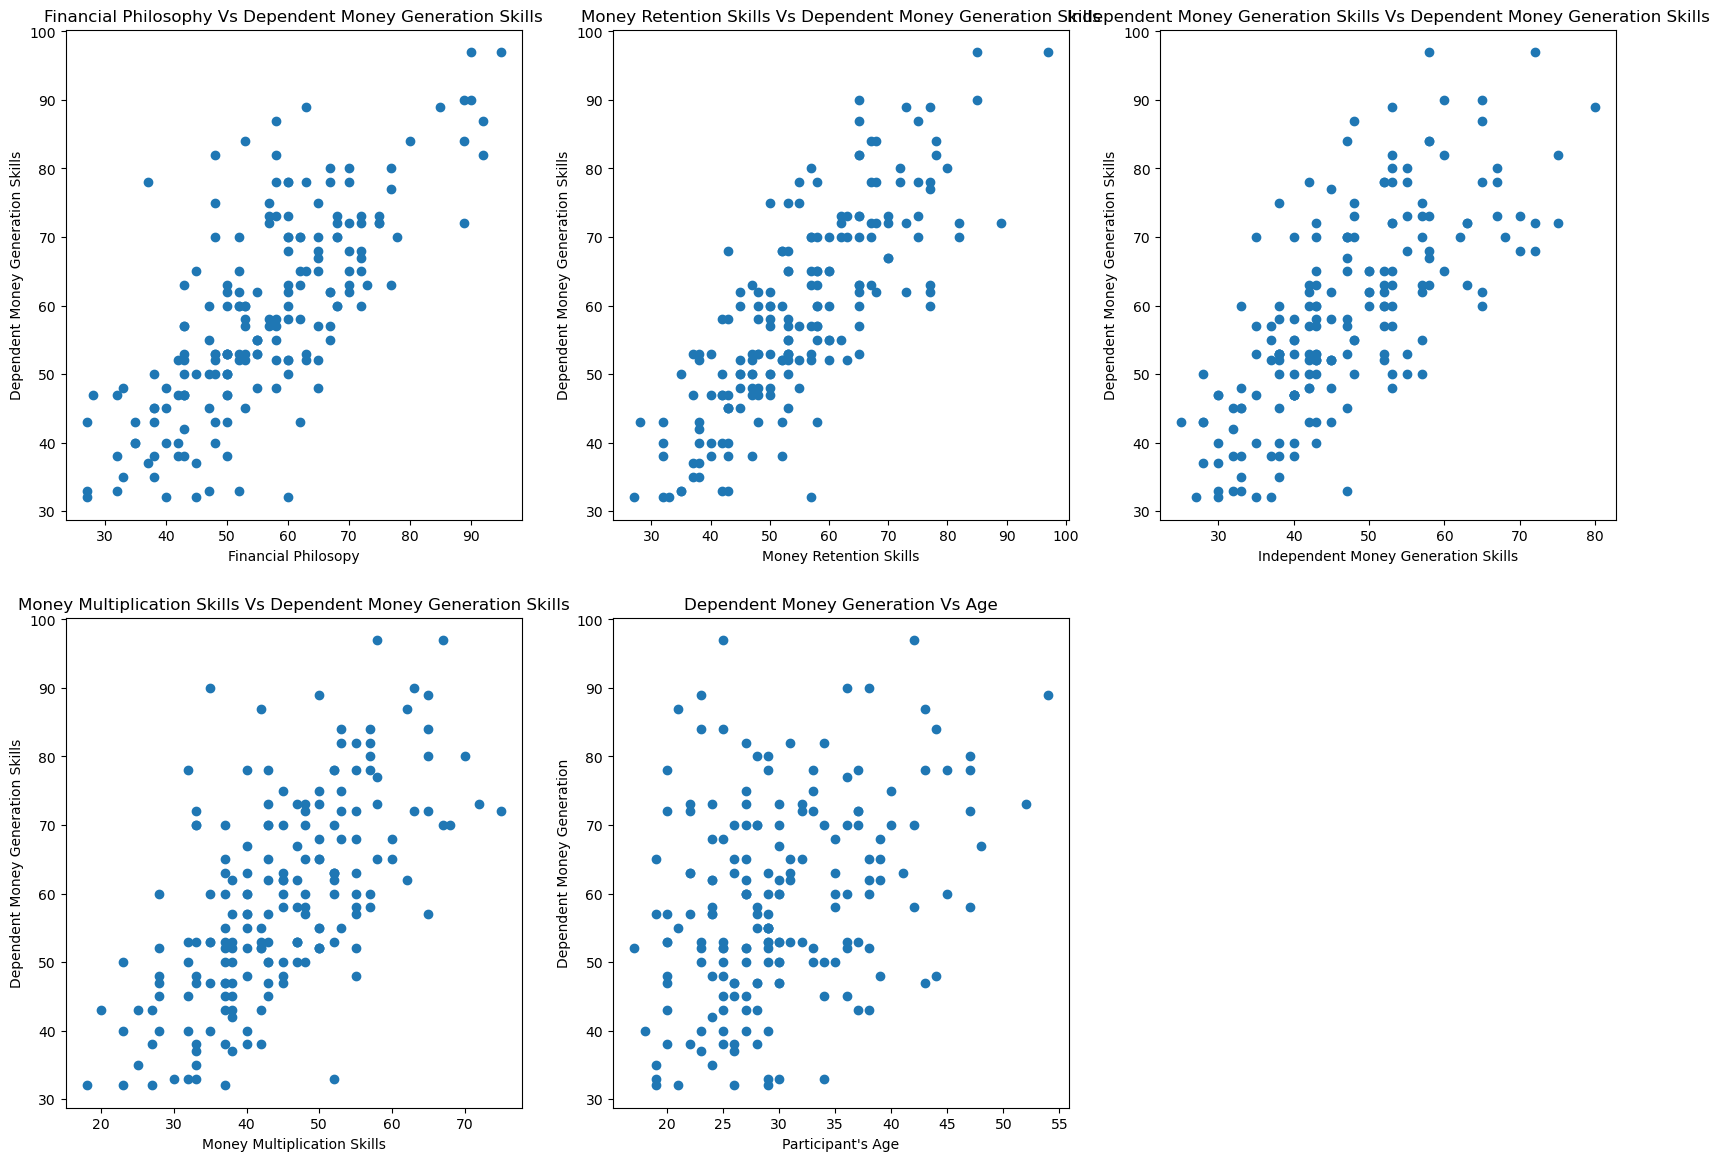

In [45]:
plt.figure(figsize=(20,14))
plt.subplot(2,3,1)
plt.scatter(x=findex.fin_philosophy, y=findex.dep_money_generation)
plt.xlabel('Financial Philosopy')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Financial Philosophy Vs Dependent Money Generation Skills' )
plt.subplot(2,3,2)
plt.scatter(x=findex.money_retention, y=findex.dep_money_generation)
plt.xlabel('Money Retention Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Money Retention Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,3)
plt.scatter(x=findex.ind_money_gen, y=findex.dep_money_generation)
plt.xlabel('Independent Money Generation Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Independent Money Generation Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,4)
plt.scatter(x=findex.money_multiplication, y=findex.dep_money_generation)
plt.xlabel('Money Multiplication Skills')
plt.ylabel('Dependent Money Generation Skills')
plt.title('Money Multiplication Skills Vs Dependent Money Generation Skills')
plt.subplot(2,3,5)
plt.scatter(x=findex.age, y= findex.dep_money_generation)
plt.title('Dependent Money Generation Vs Age')
plt.xlabel("Participant's Age")
plt.ylabel('Dependent Money Generation')
plt.show()

In [46]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
fin_phi_coff, p = pearsonr(x=findex.fin_philosophy, y=findex.dep_money_generation)
print(f'Correlation coefficient of Financial Philosophy is: {fin_phi_coff.round(4)}')
print(f'The p_value for Financial Philosophy is:{p.round(4)}')


Correlation coefficient of Financial Philosophy is: 0.7419
The p_value for Financial Philosophy is:0.0


In [47]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
mon_ren_coff, p = pearsonr(x=findex.money_retention, y=findex.dep_money_generation)
print(f'Correlation coefficient of Money Retention is: {mon_ren_coff.round(4)}')
print(f'The p_value for Money Retention is: {p.round(4)}')



Correlation coefficient of Money Retention is: 0.794
The p_value for Money Retention is: 0.0


In [48]:

model = sm.OLS.from_formula('dep_money_generation ~ money_retention', data=findex)
results = model.fit()
print(results.params)

Intercept          10.510471
money_retention     0.877480
dtype: float64


In [49]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
indep_mon_ren_coff, p = pearsonr(x=findex.ind_money_gen, y=findex.dep_money_generation)
print(f'Correlation coefficient of Independent Money Generation is: {indep_mon_ren_coff.round(4)}')
print(f'The p_value for Independent Money Generation is: {p.round(4)}')

Correlation coefficient of Independent Money Generation is: 0.7155
The p_value for Independent Money Generation is: 0.0


In [50]:
#Calculate the Correlation coefficient and the p-value using the Pearsonr function rounding it to 4 decimal places
mon_mul_coff, p = pearsonr(x=findex.money_multiplication, y=findex.dep_money_generation)
print(f'Correlation coefficient of Money Multiplication is: {mon_mul_coff.round(4)}')
print(f'The p_value for Money Multiplication is: {p.round(4)}')

Correlation coefficient of Money Multiplication is: 0.6419
The p_value for Money Multiplication is: 0.0


## Multiple Regression Model to Predict Financial Success Index

In [52]:
X = findex[['fin_philosophy','money_retention','money_multiplication']]
y= findex['findex_score']
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the Findex Score for person   where the qualification  is BSC, Financial Philosophy 70 and money retention is 70 :
predicted_findex = regr.predict([[70, 70,50]])
print(predicted_findex)



[63.4352942]


C:\Users\Python\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
# Assuming findex is a pandas DataFrame

# Select features (financial philosophy, money retention, and qualification)
X = findex[['fin_philosophy', 'money_retention', 'qualification']]

# One-hot encode the categorical feature 'qualification' (optional)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['qualification']])

# Combine encoded categorical feature with numerical features
X = pd.concat([X[['fin_philosophy', 'money_retention']], X_encoded], axis=1)

# Select target variable (findex score)
y = findex['findex_score']

# Create a linear regression model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Train the model with the features (X) and target (y)
regr.fit(X, y)

# Create a new data point for prediction (assuming 'BSc' is encoded)
new_data = [[70, 70, 'BSc']]  # Financial Philosophy 70, Money Retention 70, Qualification (BSc)

# One-hot encode the qualification for prediction (optional)
new_data_encoded = encoder.transform(pd.DataFrame(new_data[:, -1:], columns=['qualification']))

# Combine encoded qualification with numerical features
new_data = np.concatenate((new_data[:, :2], new_data_encoded), axis=1)

# Predict the Findex Score for the new data point
predicted_findex = regr.predict(new_data)

# Print the predicted score (assuming it's a single value)
print("Predicted Findex Score:", predicted_findex[0])

C:\Users\Python\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid